<a href="https://colab.research.google.com/github/RewatiDharmik/stock-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
#Importing the data
train= pd.read_csv('/content/drive/MyDrive/stock prediction/Price_Train.csv')
test= pd.read_csv('/content/drive/MyDrive/stock prediction/Price_Test.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values

In [5]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [6]:
train_open_scaled[60]

array([0.08627874])

In [7]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [8]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [9]:
xtrain.shape

(1198, 60, 1)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=25)

Epoch 1/25
40/40 [==============================] - 14s 121ms/step - loss: 0.0324
Epoch 2/25
40/40 [==============================] - 7s 171ms/step - loss: 0.0069
Epoch 3/25
40/40 [==============================] - 5s 121ms/step - loss: 0.0064
Epoch 4/25
40/40 [==============================] - 6s 144ms/step - loss: 0.0055
Epoch 5/25
40/40 [==============================] - 7s 176ms/step - loss: 0.0053
Epoch 6/25
40/40 [==============================] - 7s 162ms/step - loss: 0.0054
Epoch 7/25
40/40 [==============================] - 7s 168ms/step - loss: 0.0047
Epoch 8/25
40/40 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 9/25
40/40 [==============================] - 8s 199ms/step - loss: 0.0049
Epoch 10/25
40/40 [==============================] - 5s 130ms/step - loss: 0.0042
Epoch 11/25
40/40 [==============================] - 5s 137ms/step - loss: 0.0041
Epoch 12/25
40/40 [==============================] - 7s 162ms/step - loss: 0.0042
Epoch 13/25
40/40 [=====

In [12]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [13]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [14]:
xtest= np.array(xtest)

In [15]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 2s 2s/step


In [16]:
predicted_value= ss.inverse_transform(predicted_value)

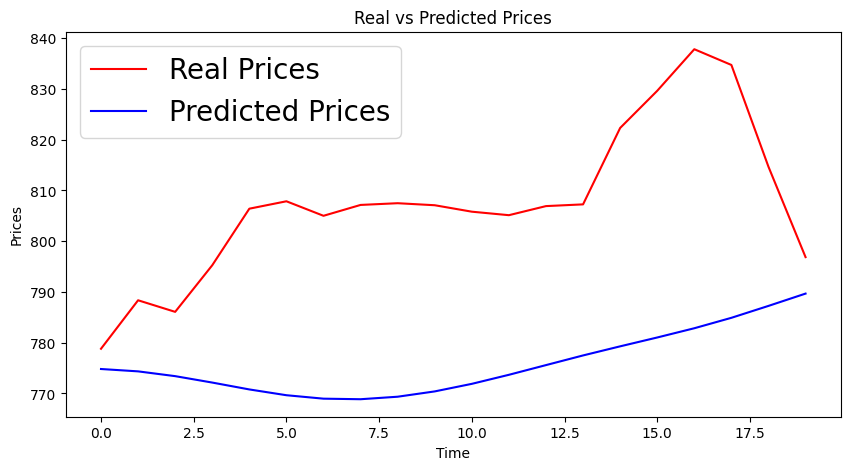

In [18]:
plt.figure(figsize=(10,5))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [19]:
from keras.wrappers.scikit_learn import KerasRegressor

In [20]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

<ipython-input-20-377da2acfaed>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=reg)


In [21]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [20, 10],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/10
20/20 [==============================] - 12s 145ms/step - loss: 0.0667
Epoch 2/10
20/20 [==============================] - 3s 144ms/step - loss: 0.0210
Epoch 3/10
20/20 [==============================] - 5s 232ms/step - loss: 0.0207
Epoch 4/10
20/20 [==============================] - 3s 154ms/step - loss: 0.0137
Epoch 5/10
20/20 [==============================] - 3s 146ms/step - loss: 0.0167
Epoch 6/10
20/20 [==============================] - 3s 145ms/step - loss: 0.0133
Epoch 7/10
20/20 [==============================] - 4s 193ms/step - loss: 0.0103
Epoch 8/10
20/20 [==============================] - 4s 195ms/step - loss: 0.0139
Epoch 9/10
20/20 [==============================] - 3s 146ms/step - loss: 0.0124
Epoch 10/10
5/5 [==============================] - 2s 47ms/step - loss: 0.0015
Epoch 1/10
20/20 [==============================] - 13s 147ms/step - loss: 0.0481
Epoch 2/10
20/20 [==============================] - 3s 148ms/step - loss: 0.0164
Epoch 3/10
20/20 [==========

In [22]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/10
24/24 [==============================] - 15s 194ms/step - loss: 0.0775
Epoch 2/10
24/24 [==============================] - 10s 396ms/step - loss: 0.0101
Epoch 3/10
24/24 [==============================] - 4s 175ms/step - loss: 0.0058
Epoch 4/10
24/24 [==============================] - 4s 149ms/step - loss: 0.0054
Epoch 5/10
24/24 [==============================] - 4s 181ms/step - loss: 0.0054
Epoch 6/10
24/24 [==============================] - 5s 199ms/step - loss: 0.0051
Epoch 7/10
24/24 [==============================] - 4s 150ms/step - loss: 0.0045
Epoch 8/10
24/24 [==============================] - 4s 150ms/step - loss: 0.0052
Epoch 9/10
24/24 [==============================] - 6s 235ms/step - loss: 0.0048
Epoch 10/10
24/24 [==============================] - 4s 149ms/step - loss: 0.0048


In [23]:
model

1/1 [==============================] - 2s 2s/step


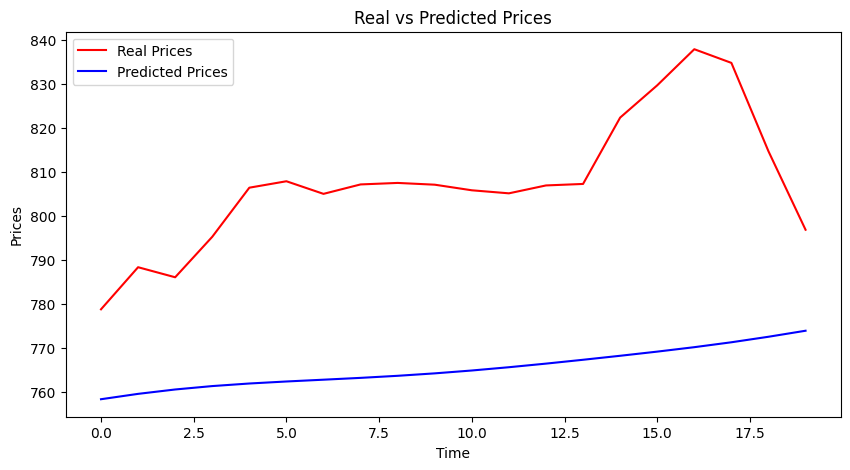

In [24]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(10,5))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=10)